In [1]:
import pandas as pd

In [2]:
!pip install pandas

In [3]:
import pandas as pd

In [4]:
import os
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

# Visualization
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [5]:
crop = pd.read_csv("Crop_data.csv")
crop.head()

,State,Soil_Type,Nitrogen,Phosphate,Potash,Temperature (C),Humidity (%),pH,Rainfall (mm),Zinc,Sulphur,Soil Organic Carbon,Cation Exchange Capacity (meq/100g),Suitable Crop
0,Bihar,Peaty,60,67,117,27.8,71.6,7.4,1319.7,2.14,5.1,1.78,23.1,Barley
1,Madhya Pradesh,Black,110,88,97,24.9,52.1,8.3,2400.6,2.31,7.0,1.47,16.7,Wheat
2,Uttar Pradesh,Clayey,118,69,67,24.3,76.8,4.8,1876.3,2.60,31.3,1.65,26.8,Pulses
3,Bihar,Alluvial,52,90,122,20.5,38.2,8.0,2871.0,2.46,20.2,0.95,26.4,Pulses
4,Karnataka,Mountain,53,70,47,38.2,88.7,6.5,2534.0,2.03,38.8,2.13,18.2,Rice


In [6]:
corr=crop.drop(['Suitable Crop'],axis=1).corr() 
corr

C:\Users\HP\AppData\Local\Temp\ipykernel_7912\1834721954.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=crop.drop(['Suitable Crop'],axis=1).corr()


,Nitrogen,Phosphate,Potash,Temperature (C),Humidity (%),pH,Rainfall (mm),Zinc,Sulphur,Soil Organic Carbon,Cation Exchange Capacity (meq/100g)
Nitrogen,1.000000,0.005555,-0.004170,-0.003383,-0.005250,-0.004689,-0.002720,-0.005766,-0.003566,0.012886,-0.012314
Phosphate,0.005555,1.000000,0.008407,-0.007547,0.002064,-0.001408,0.006072,0.009991,0.001062,-0.000324,-0.002525
Potash,-0.004170,0.008407,1.000000,-0.010436,0.005767,-0.002458,-0.004195,-0.016865,-0.002944,-0.008762,-0.008948
Temperature (C),-0.003383,-0.007547,-0.010436,1.000000,-0.003018,-0.005247,0.002262,0.004443,-0.009607,-0.005583,-0.001028
Humidity (%),-0.005250,0.002064,0.005767,-0.003018,1.000000,0.002453,0.007485,0.004029,-0.005082,-0.003632,-0.015537
pH,-0.004689,-0.001408,-0.002458,-0.005247,0.002453,1.000000,0.005398,0.009316,0.003436,0.011118,0.009953
Rainfall (mm),-0.002720,0.006072,-0.004195,0.002262,0.007485,0.005398,1.000000,-0.017061,0.001680,-0.001857,-0.012723
Zinc,-0.005766,0.009991,-0.016865,0.004443,0.004029,0.009316,-0.017061,1.000000,-0.006004,-0.000546,-0.007789
Sulphur,-0.003566,0.001062,-0.002944,-0.009607,-0.005082,0.003436,0.001680,-0.006004,1.000000,-0.013845,0.004753
Soil Organic Carbon,0.012886,-0.000324,-0.008762,-0.005583,-0.003632,0.011118,-0.001857,-0.000546,-0.013845,1.000000,-0.002950


<Axes: >

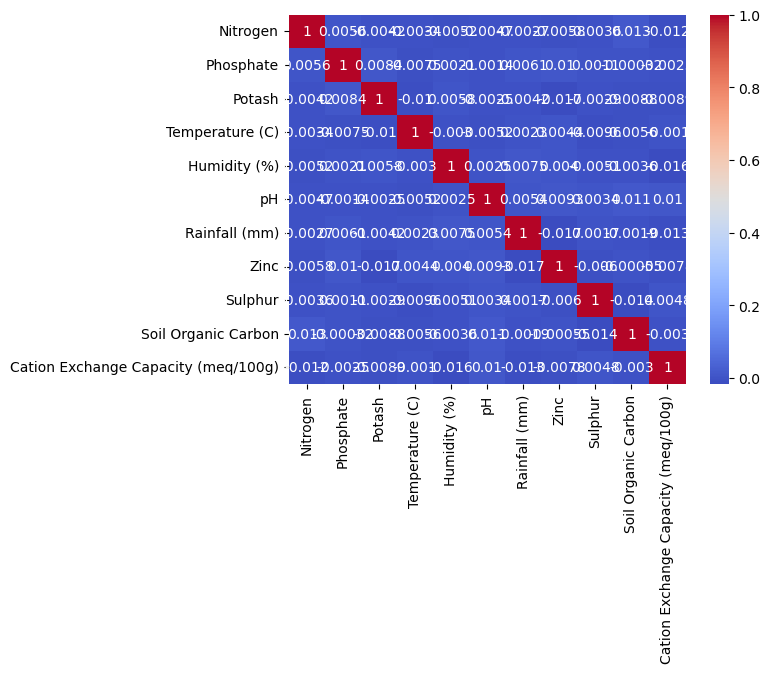

In [7]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')

In [8]:
crop['Suitable Crop'].value_counts()

Maize         2045
Barley        2041
Rice          2034
Millets       2023
Vegetables    2016
Pulses        1997
Wheat         1990
Cotton        1966
Sugarcane     1958
Soybean       1929
pradesh          1
Name: Suitable Crop, dtype: int64

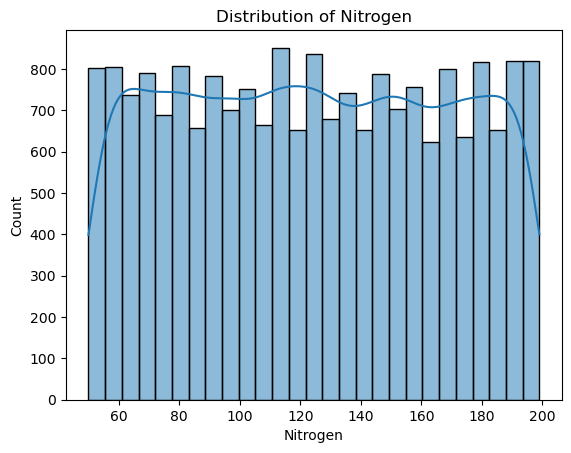

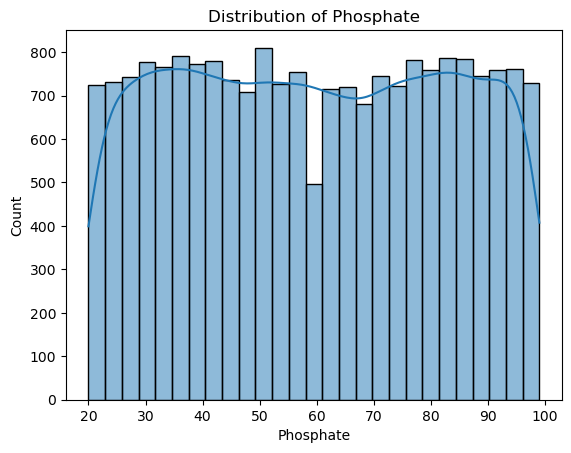

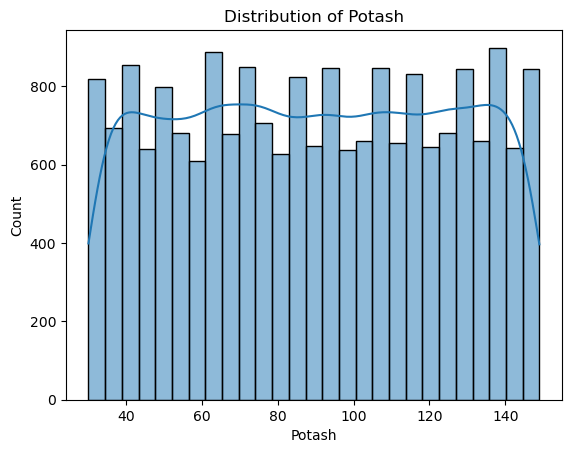

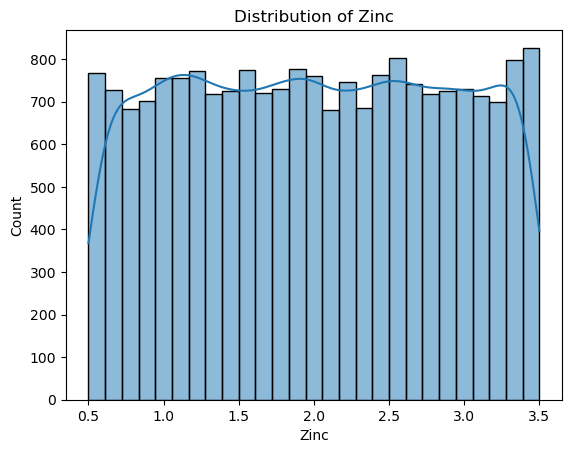

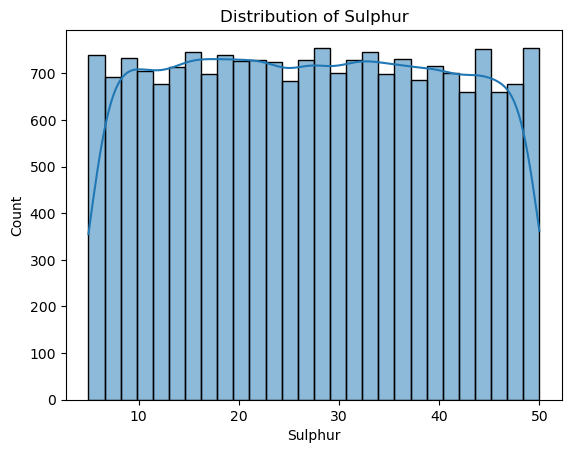

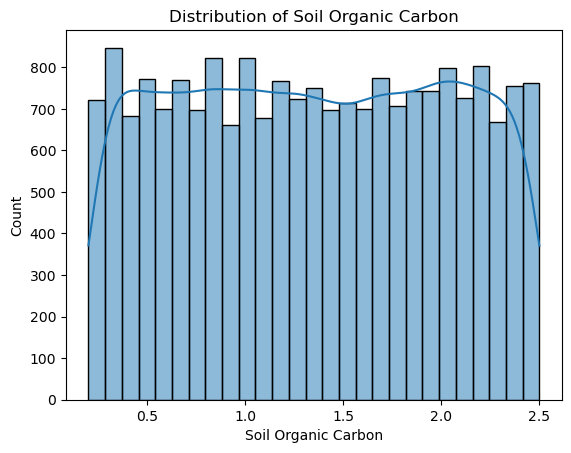

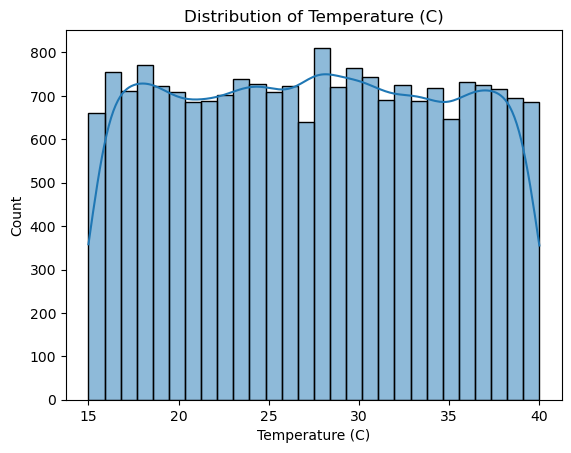

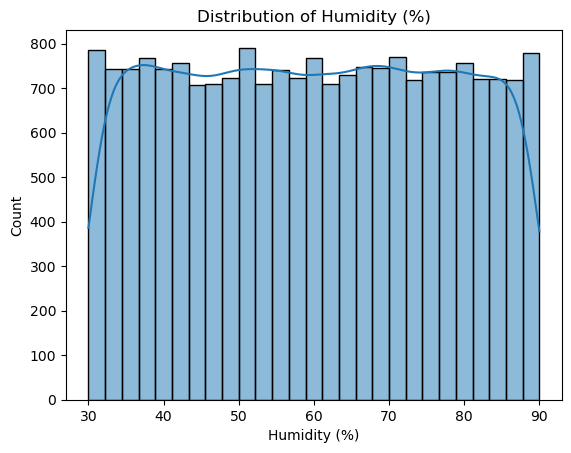

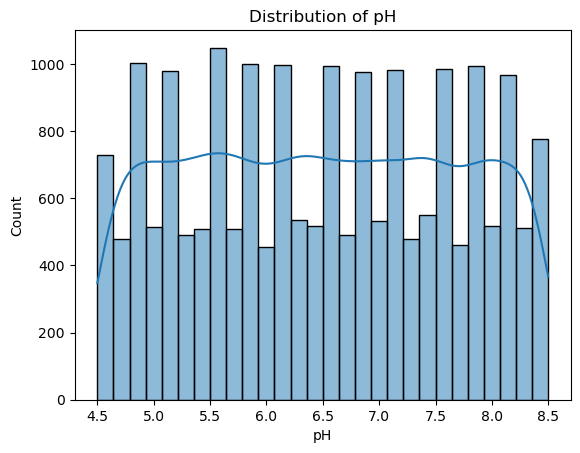

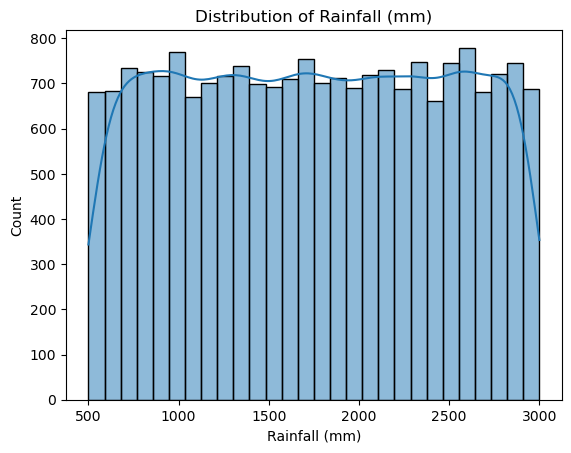

In [9]:
features = ['Nitrogen','Phosphate', 'Potash', 'Zinc', 'Sulphur', 'Soil Organic Carbon','Temperature (C)', 'Humidity (%)', 'pH', 'Rainfall (mm)']
for feature in features:
    sns.histplot(crop[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

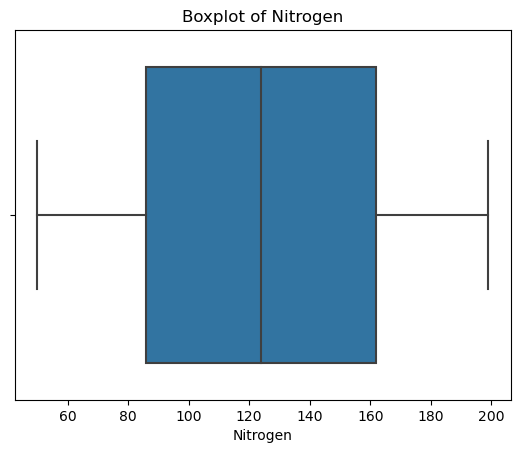

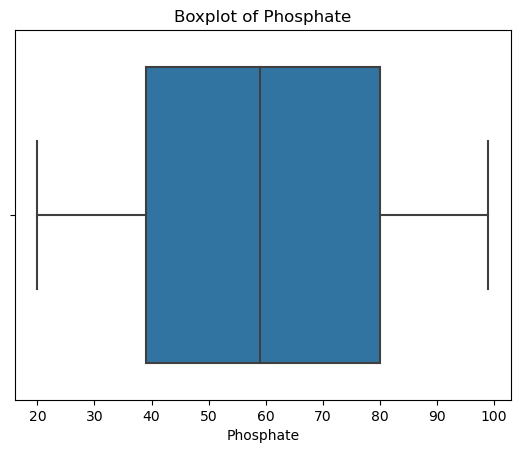

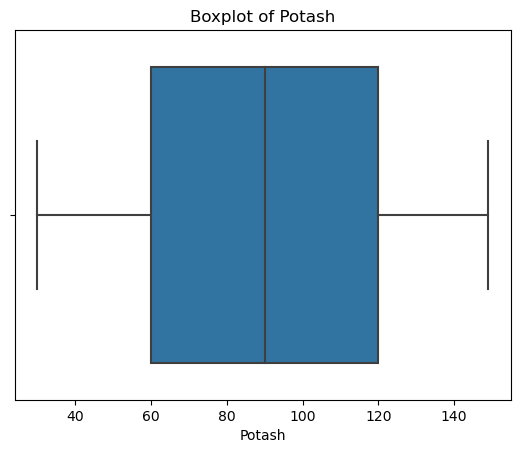

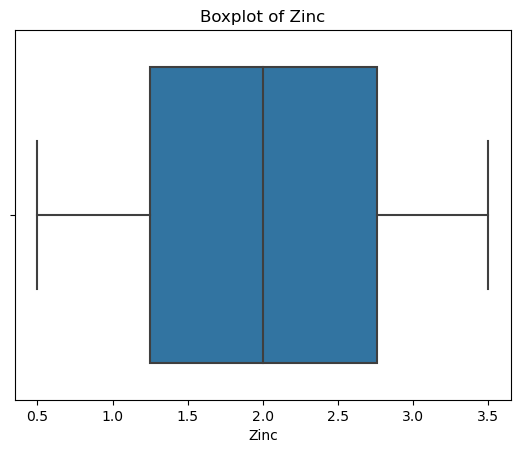

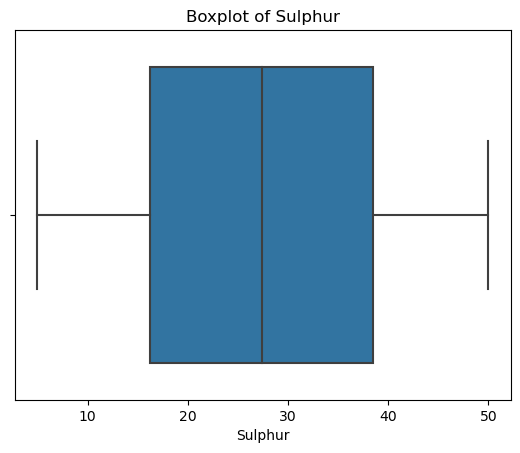

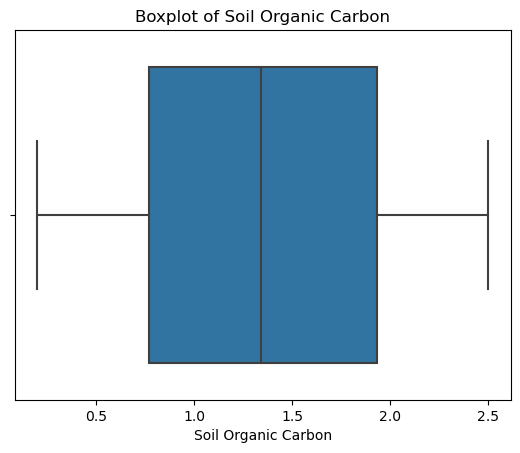

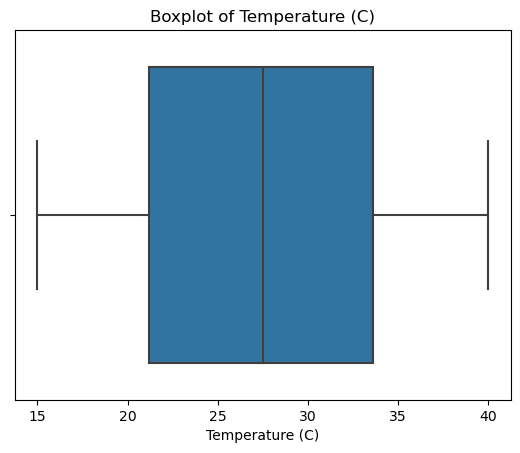

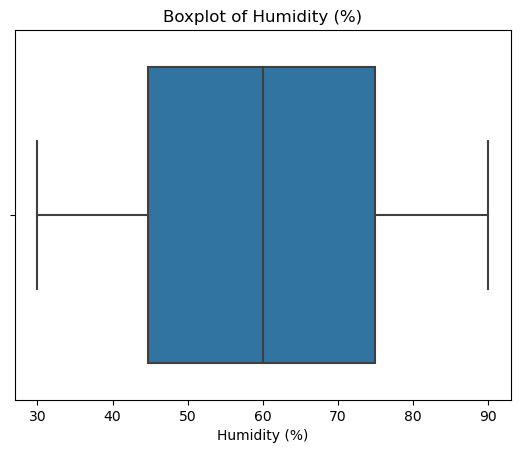

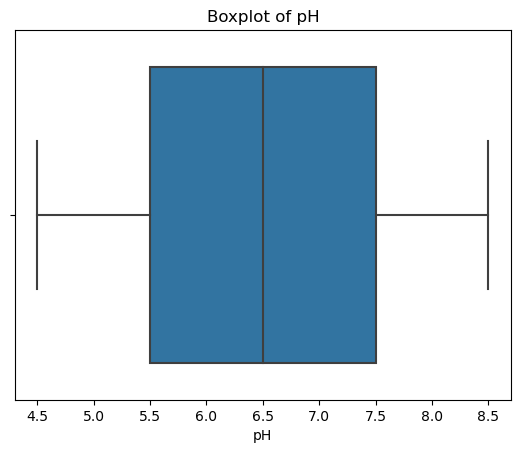

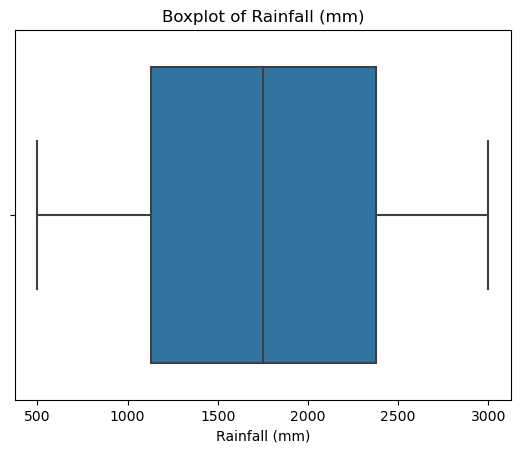

In [10]:
features = ['Nitrogen','Phosphate', 'Potash', 'Zinc', 'Sulphur', 'Soil Organic Carbon','Temperature (C)', 'Humidity (%)', 'pH', 'Rainfall (mm)']
for feature in features:
    sns.boxplot(x=crop[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

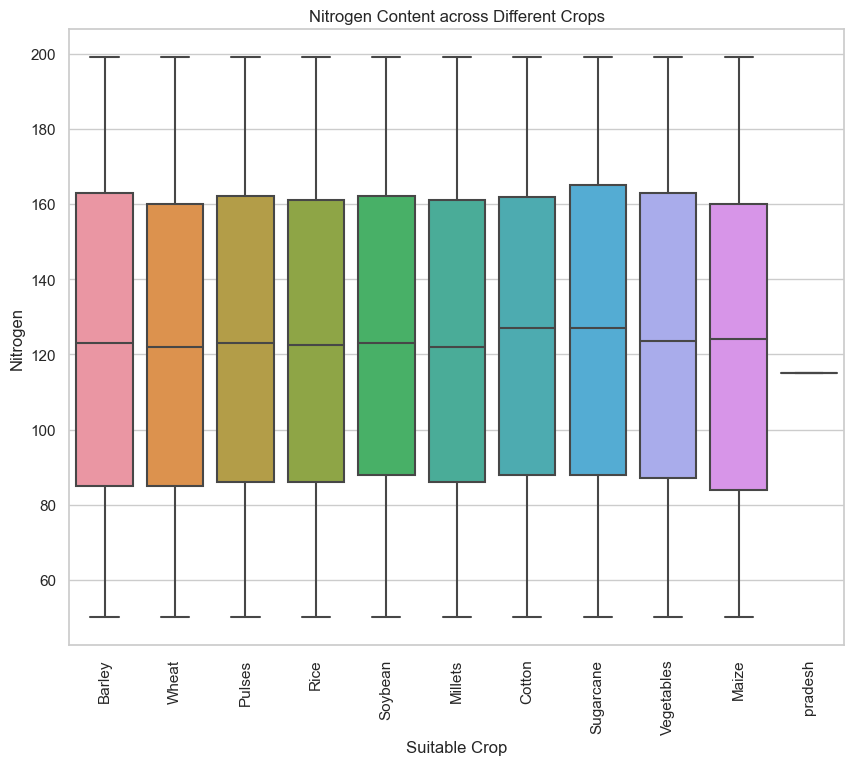

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting plot aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 8]


# Box Plots for a variable against crop types
sns.boxplot(x='Suitable Crop', y='Nitrogen', data=crop)
plt.xticks(rotation=90)
plt.title('Nitrogen Content across Different Crops')
plt.show()